<center>
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Project: Data Quality and Data Wrangling : Stroke Prediction 🏥
       </h2>
</center>

<p style="font-size:2em">📜 Table of Content:</p><br>
<div style="font-size:1.5em">
    <ul>
        <li>
          <a href="#intro">Introduction 🧾</a>
       </li><br>
       <li>
          <a href="#pre-processing">Prepare a dataset 📂</a>
       </li><br>
        <li>
          <a href="#ftr-selct"> Feature Selection 🛒</a>
       </li><br>
    </ul>
</div>

<div id="intro">
        <h1 style="color:#1a1a1a">
         Introduction 🧾
        </h1>
</div>

Stroke is the fifth cause of death in the United States, according to the Heart Disease and Stroke Statistics 2020 report. Those who suffer from stroke, if luckily survived, may also suffer from expensive medical bills and even disability. Foreseeing the underlying risk factors of stroke is highly valuable to stroke screening and prevention. In this project, the National Health and Nutrition Examination Survey (NHANES) data from the National Center for Health Statistics (NCHS) is used. The NHANES dataset holds an abundance of variables, ranging from demographics, medical history, physical examinations, biochemistry to dietary and lifestyle questionnaires. Known features contributing to stroke, such as blood pressure, serum cholesterol level, alcohol consumption, weight, etc., and additional features will be selected.

Main elements include data cleaning, imbalance dataset processing, feature selection from over 1,000 variables.

<h4 style="color:grey"> Importing Libraries</h4>

In [1]:
# Setup Matplotlib to plot inline ( within the notebook )
%matplotlib inline
import matplotlib

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import numPy under the abbreviation 'np'
import numpy as np

import sklearn
import seaborn as sns

In [2]:
#  ignore wornings
import warnings

warnings.filterwarnings("ignore")

<div id="pre-processing">
        <h1 style="color:#1a1a1a">
            Prepare a dataset 📂
        </h1>
</div>

### Datasets
- NHANES Datasets<br><br>
https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey
<br><br>
- Variable Search<br><br>
https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx
<br><br>
- Varibles Labels<br><br>
https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Demographics&CycleBeginYear=2013
<br><br>


In [3]:
# datasets path and df names
path = [
    'demographic.csv',
    'examination.csv',
    'questionnaire.csv',
    'labs.csv',
    'diet.csv'
]

dfname = [
    'dm',
    'exam',
    'qs',
    'lab',
    'diet'
]

In [5]:
# Create an empty dictionary named df
df = {}

# Create a dictionary named dfn by zipping dfname and path
dfn = dict(zip(dfname, path))

# Use a dictionary comprehension to read CSV files into pandas DataFrames
# The key is the dataset name, and the value is the corresponding file path
df = {key: pd.read_csv(value) for key, value in dfn.items()}

In [6]:
# Select specific DataFrames from the df dictionary based on keys
Xs = {k: v for k, v in df.items() if k in ['dm', 'exam', 'labs']}

# Extract the values (DataFrames) from the selected Xs dictionary
dfs = Xs.values()

# Import necessary libraries
from functools import partial, reduce

# Define a partial function for inner merging on the 'SEQN' column
inner_merge = partial(pd.merge, how='inner', on='SEQN')

# Use reduce to iteratively apply inner merges to the list of DataFrames
c = reduce(inner_merge, dfs)

# Display the resulting merged DataFrame
print(c)

# Check for duplicated 'SEQN' values in the merged DataFrame
duplicated_seqn_counts = c.SEQN.duplicated().value_counts()

# Display the count of duplicated 'SEQN' values
print(duplicated_seqn_counts)



       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0     73557         8         2         1        69       NaN         4   
1     73558         8         2         1        54       NaN         3   
2     73559         8         2         1        72       NaN         3   
3     73560         8         2         1         9       NaN         3   
4     73561         8         2         2        73       NaN         3   
...     ...       ...       ...       ...       ...       ...       ...   
9808  83727         8         2         1        26       NaN         2   
9809  83728         8         2         2         2      24.0         1   
9810  83729         8         2         2        42       NaN         4   
9811  83730         8         2         1         7       NaN         2   
9812  83731         8         2         1        11       NaN         5   

      RIDRETH3  RIDEXMON  RIDEXAGM  ...  CSXLEAOD  CSXSOAOD  CSXGRAOD  \
0            4       1.0  

We merged the different datasets from all files into one dataframe using the SEQN column

In [7]:
# show combined df
qs = df['qs'][['SEQN','MCQ160F']]
qs

,SEQN,MCQ160F
0,73557,1.0
1,73558,2.0
2,73559,2.0
3,73560,NaN
4,73561,2.0
...,...,...
10170,83727,2.0
10171,83728,NaN
10172,83729,2.0
10173,83730,NaN


In [8]:
c = pd.merge(c,qs, how='left', on='SEQN')
c

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT,MCQ160F
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0,1.0
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0,2.0
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0,2.0
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,8,2,1,26,NaN,2,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9809,83728,8,2,2,2,24.0,1,1,2.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,8,2,2,42,NaN,4,4,2.0,NaN,...,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0,2.0
9811,83730,8,2,1,7,NaN,2,2,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
c.MCQ160F.value_counts()

2.0    5389
1.0     194
9.0       5
Name: MCQ160F, dtype: int64

Here are the classes present in the target variable

### Exclude rows with null values or NA for MCQ160F
The prediction target in the dataset is MCQ160F, a questionnaire question "Has a doctor or other health professional ever told you that you had a stroke?"


In [10]:
# MCQ160F (target feature): exclude null values and NA
c = c[(c.MCQ160F.notnull()) & (c.MCQ160F != 9)]

# check MCQ160F
c.MCQ160F.describe()

count    5583.000000
mean        1.965252
std         0.183158
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: MCQ160F, dtype: float64

Here in the variable description a vaue 9 has no meaning. So, we exclude it too.

In [11]:
# target varoable counts
c.MCQ160F.value_counts()

2.0    5389
1.0     194
Name: MCQ160F, dtype: int64

### NHANES Labels Scraping
- Codebook with variable and sas label parsed with Beautiful Soup:


In [12]:
# import code book
Labels = pd.read_csv('NHANES_Labels.csv')

Labels

,variable,label
0,SEQN,Respondent sequence number
1,SDDSRVYR,Data release cycle
2,RIDSTATR,Interview/Examination status
3,RIAGENDR,Gender
4,RIDAGEYR,Age in years at screening
...,...,...
3846,WHD140,Self-reported greatest weight (pounds)
3847,WHQ150,Age when heaviest weight
3848,WHQ030M,How do you consider your weight
3849,WHQ500,Trying to do about weight


### Data Cleaning

In [13]:
# exclude non-numeric values
d = c.select_dtypes(['number'])

# exclue columns that have over 50% NaN
d = d.dropna(thresh = 0.5*len(d), axis =1)

print(len(d.columns), 'columns left.')

153 columns left


In [14]:
# changing target variable coding from 1, 2 to 0 (Negative), 1 (Positive)
d['MCQ160F']=d.apply(lambda x: 1 if x.MCQ160F == 1 else 0, axis='columns')
d.MCQ160F.value_counts()

0    5389
1     194
Name: MCQ160F, dtype: int64

<div id="ftr-selct">
        <h1 style="color:#1a1a1a">
              Feature Selection 🛒
        </h1>
</div>

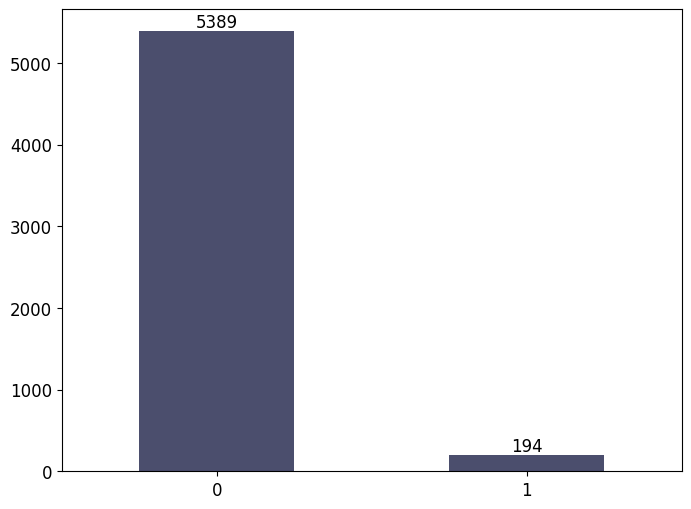

In [15]:
vals = d.MCQ160F.value_counts()

plt.figure(figsize=(8,6))
plt.rc('font', size=12)

ax = vals.plot.bar(rot=0, color='#4B4E6D')

for i in range(len(vals)):
    ax.annotate(vals[i], xy=[vals.index[i], vals[i]], ha='center', va='bottom')

This figure clearly illustrates the imbalance present in our data.

In [16]:
# Import the SimpleImputer class from the sklearn library
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the strategy 'most_frequent'
imp_mode = SimpleImputer(strategy='most_frequent')

# fill missing values using the most frequent value for each column
# and create a new DataFrame 'd' with the imputed values
d = pd.DataFrame(imp_mode.fit_transform(d), columns=d.columns)


In [17]:
#we use this data cleaning strategy to fill null values in the reamining columns

### Train/Test Split

In [18]:
X = d.loc[:, d.columns != 'MCQ160F']
y = d.MCQ160F

In [19]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5583, 152)
y shape: (5583,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### XGBClassifier for feature selection
From the classificaiton result, the accuracy is pretty decent. However once look into the confusion matrix we can see there is only 1 correct prediction for class 1 (recall for class 1 is bad). This is commonly seen for imbalanced dataset, which the classes in the dataset have highly uneven sample sizes. Imbalanced problems is often seen in healthcare  datasets.

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

def confusion(y_test, y_pred):
    conf = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
    print('Confusion Matrix:')
    print(conf)
    return conf

confusion(y_test, y_pred)

Accuracy: 96.33%
Confusion Matrix:
         Predict[0]  Predict[1]
True[0]        1075           1
True[1]          40           1


,Predict[0],Predict[1]
True[0],1075,1
True[1],40,1


In [22]:
#to illustrate the impact of treating imbalanced we trained a simple XGB model and printed its confusion matrix

### Upsampling minority class
In the following cells the minority class is upsampled with SMOTE (Synthetic Minority Oversampling Technique).

In [23]:
y_test.value_counts()


0.0    1076
1.0      41
Name: MCQ160F, dtype: int64

#### Oversampling with SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
X_test_sm = pd.DataFrame(X_test_sm, columns=X.columns)

In [25]:
print(y_train_sm.value_counts())
print(y_test_sm.value_counts())

0.0    4313
1.0    4313
Name: MCQ160F, dtype: int64
0.0    1076
1.0    1076
Name: MCQ160F, dtype: int64


Here we used the SMOTE algorithm to try to balance our data

#### Check the Classification Result Again
After oversampling, the classification result is as below.

In [26]:
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)
y_pred_sm = model.predict(X_test_sm)

accuracy = accuracy_score(y_test_sm, y_pred_sm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
conf = pd.DataFrame(confusion_matrix(y_test_sm, y_pred_sm), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
conf

Accuracy: 96.19%


,Predict[0],Predict[1]
True[0],1075,1
True[1],81,995


So, after treating the imbalance data, we see can in this confusion matrix how the model improved , namely on the predicting the minority class.

### Feature Selection with XGBoost

<Axes: >

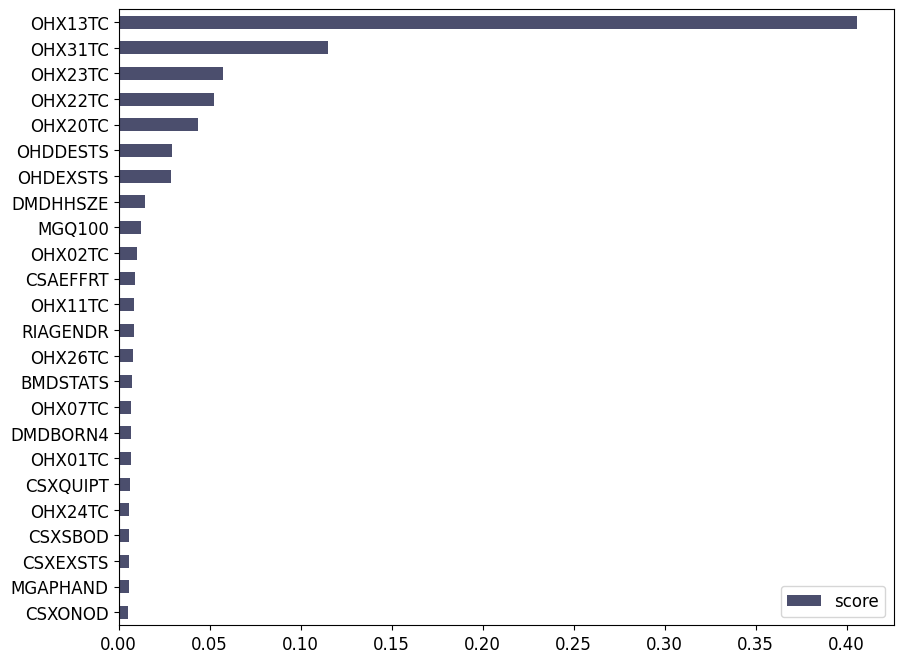

In [27]:
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)

# Features selected by XGBoost
keys = list(model.get_booster().feature_names)
values = list(model.feature_importances_)

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

# Top 24 features
xgbfs_ = data[:24]

# Plot feature score
xgbfs_.sort_values(by='score').plot(kind='barh', figsize=(10, 8), color='#4B4E6D')


We use this time XGB to measure the relevance of columns , we see in the plots that some columns have significantly more influence on the target than other

In [28]:
xgbfs_.reset_index()

,index,score
0,OHX13TC,0.405475
1,OHX31TC,0.114798
2,OHX23TC,0.057352
3,OHX22TC,0.052562
4,OHX20TC,0.043461
5,OHDDESTS,0.029579
6,OHDEXSTS,0.028928
7,DMDHHSZE,0.014266
8,MGQ100,0.012163
9,OHX02TC,0.010162


### Merge SAS Labels from the codebook

In [29]:
xgbfs = xgbfs_.reset_index()
xgbfs.columns=['variable', 'score']

xgbfs['variable'] = xgbfs['variable'].apply(lambda x: x.upper())

xgbfs = pd.merge(left=xgbfs, right=Labels, left_on='variable', right_on='variable', how='left')
xgbfs

,variable,score,label
0,OHX13TC,0.405475,Tooth Count: #13
1,OHX31TC,0.114798,Tooth Count: #31
2,OHX23TC,0.057352,Tooth Count: #23
3,OHX22TC,0.052562,Tooth Count: #22
4,OHX20TC,0.043461,Tooth Count: #20
5,OHDDESTS,0.029579,Dentition Status Code
6,OHDEXSTS,0.028928,Overall Oral Health Exam Status
7,DMDHHSZE,0.014266,# of adults 60 years or older in HH
8,MGQ100,0.012163,Recent pain/aching/stiffness-left hand
9,OHX02TC,0.010162,Tooth Count: #2


this table is the representation of the previous plot with the description of every column

In [30]:
# final variables
var_list = xgbfs.variable.tolist()
var_list.append('MCQ160F')
print(var_list)

['OHX13TC', 'OHX31TC', 'OHX23TC', 'OHX22TC', 'OHX20TC', 'OHDDESTS', 'OHDEXSTS', 'DMDHHSZE', 'MGQ100', 'OHX02TC', 'CSAEFFRT', 'OHX11TC', 'RIAGENDR', 'OHX26TC', 'BMDSTATS', 'OHX07TC', 'DMDBORN4', 'OHX01TC', 'CSXQUIPT', 'OHX24TC', 'CSXSBOD', 'CSXEXSTS', 'MGAPHAND', 'CSXONOD', 'MCQ160F']


In [31]:
#final df
df_final = d.filter(var_list)
df_final

,OHX13TC,OHX31TC,OHX23TC,OHX22TC,OHX20TC,OHDDESTS,OHDEXSTS,DMDHHSZE,MGQ100,OHX02TC,...,OHX07TC,DMDBORN4,OHX01TC,CSXQUIPT,OHX24TC,CSXSBOD,CSXEXSTS,MGAPHAND,CSXONOD,MCQ160F
0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,2.0,2.0,4.0,...,4.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0
1,2.0,4.0,2.0,2.0,5.0,1.0,1.0,0.0,2.0,2.0,...,2.0,1.0,4.0,4.0,2.0,1.0,1.0,1.0,3.0,0.0
2,2.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,3.0,0.0
3,2.0,4.0,2.0,2.0,4.0,1.0,1.0,2.0,2.0,4.0,...,2.0,1.0,4.0,2.0,4.0,3.0,2.0,1.0,3.0,0.0
4,4.0,4.0,2.0,2.0,4.0,1.0,1.0,0.0,1.0,2.0,...,4.0,1.0,4.0,4.0,2.0,1.0,1.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,4.0,5.0,2.0,2.0,4.0,1.0,1.0,2.0,2.0,4.0,...,4.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,3.0,0.0
5579,2.0,4.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,4.0,...,2.0,1.0,4.0,4.0,2.0,3.0,1.0,1.0,3.0,0.0
5580,2.0,2.0,2.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,...,2.0,2.0,4.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0
5581,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,0.0


<Axes: >

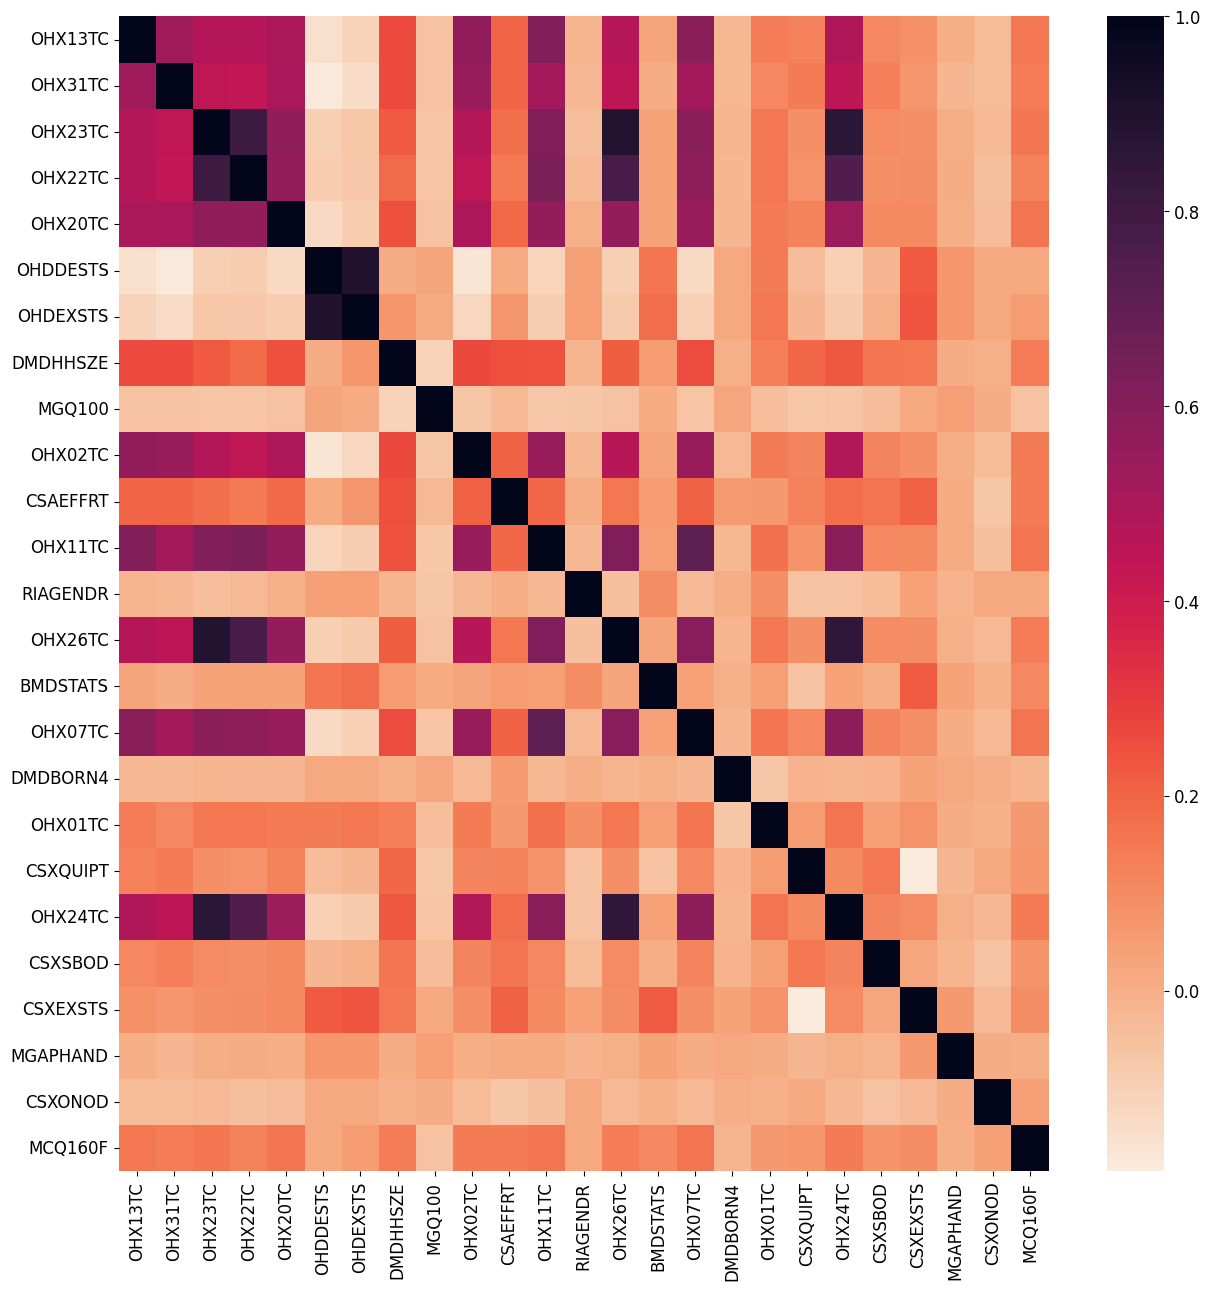

In [32]:
# sns.axes_style("white")
ax = plt.subplots(figsize=(15,15))

corr = df_final.corr()

# sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.cm.rocket_r)
sns.heatmap(corr, cmap=sns.cm.rocket_r)

In [33]:
#Finally we plot the correlation matrix of the final dataste after this cleaning process